In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Vamos a tratar la columna 'Cabin', en las
#celdas donde no hay datos 'NaN' vamos a poner un valor prefijado 'C0'
df['Cabin'] = df['Cabin'].fillna('C0')

In [8]:
#Vamos a crear una nueva columna con la info
#de si es mayor de edad (1) o no (0)
df['Of age'] = np.where(df["Age"] >= 18, 1, 0)

In [9]:
df.median

<bound method DataFrame.median of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

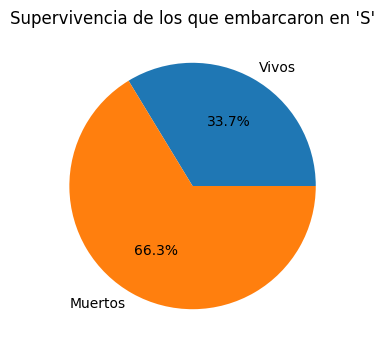

Tasa de supervivencia en 'S': 33.70%


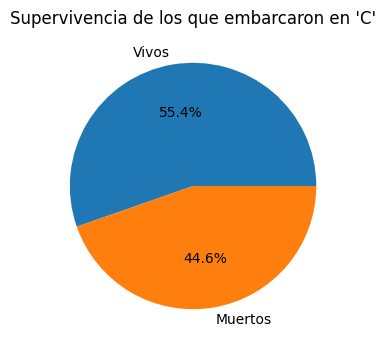

Tasa de supervivencia en 'C': 55.36%


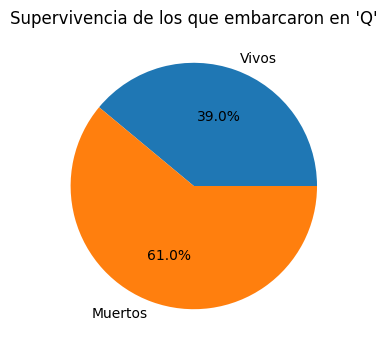

Tasa de supervivencia en 'Q': 38.96%
Como se puede observar hay correlacion entre la tasa de supervivenciay el puerto de embarque.


In [10]:
#Calculamos la tasa de supervivencia habiendo 
#embarcado en 's'
embark_s = df.loc[df['Embarked'] == 'S']['Survived']
rate_embark_s = embark_s.sum()/len(embark_s)
#mostramos una grafica con los datos obtenidos
count_s = embark_s.value_counts().reindex([1,0])
plt.figure(figsize=(8,4))
plt.pie(count_s,labels=['Vivos','Muertos'],autopct='%1.1f%%')
plt.title("Supervivencia de los que embarcaron en 'S'")
plt.show()
print(f"Tasa de supervivencia en 'S': {rate_embark_s:.2%}")
#Calculamos la tasa de supervivencia habiendo 
#embarcado en 'c'
embark_c = df.loc[df['Embarked'] == 'C']['Survived']
rate_embark_c = embark_c.sum()/len(embark_c)
#mostramos una grafica con los datos obtenidos
count_c = embark_c.value_counts().reindex([1,0])
plt.figure(figsize=(8,4))
plt.pie(count_c,labels=['Vivos','Muertos'],autopct='%1.1f%%')
plt.title("Supervivencia de los que embarcaron en 'C'")
plt.show()
print(f"Tasa de supervivencia en 'C': {rate_embark_c:.2%}")
#Calculamos la tasa de supervivencia habiendo 
#embarcado en 'q'
embark_q = df.loc[df['Embarked'] == 'Q']['Survived']
rate_embark_q = embark_q.sum()/len(embark_q)
#mostramos una grafica con los datos obtenidos
count_q = embark_q.value_counts().reindex([1,0])
plt.figure(figsize=(8,4))
plt.pie(count_q,labels=['Vivos','Muertos'],autopct='%1.1f%%')
plt.title("Supervivencia de los que embarcaron en 'Q'")
plt.show()
print(f"Tasa de supervivencia en 'Q': {rate_embark_q:.2%}")

#Conclusiones
print('Como se puede observar hay correlacion entre la tasa de supervivencia'+
     'y el puerto de embarque.')

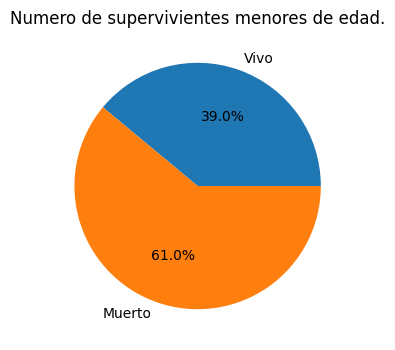

Tasa de supervivencia de los menores de edad es: 38.97%


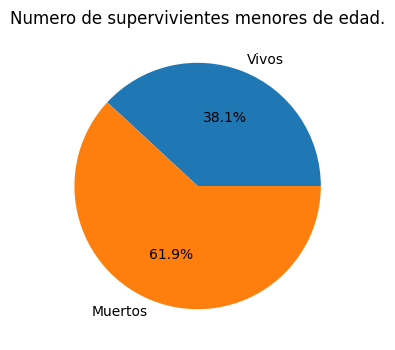

Tasa de supervivencia de los menores de edad es: 38.10%
Como podemos observar la edad no tiene relacion con la probabilidad de supervivencia


In [11]:
#Vamos a calcular la tasa de supervivenciade las
#personas menores de edad
underage = df.loc[df['Of age'] == 0]['Survived']
rate_underage = underage.sum()/len(underage)
#mostramos un grafico con la informacion
count_underage = underage.value_counts().reindex([1,0])
plt.figure(figsize=(8,4))
plt.pie(count_underage,labels=['Vivo','Muerto'],autopct='%1.1f%%')
plt.title('Numero de supervivientes menores de edad.')
plt.show()
print(f"Tasa de supervivencia de los menores de edad es: {rate_underage:.2%}")

#Vamos a calcular la tasa de supervivenciade las
#personas mayores de edad
of_age = df.loc[df['Of age'] == 1]['Survived']
rate_of_age = of_age.sum()/len(of_age)
#Vamos a mostrar un grafico con la informacion
count_of_age = of_age.value_counts().reindex([1,0])
plt.figure(figsize=(8,4))
plt.pie(count_of_age,labels=['Vivos','Muertos'],autopct='%1.1f%%')
plt.title('Numero de supervivientes menores de edad.')
plt.show()
print(f"Tasa de supervivencia de los menores de edad es: {rate_of_age:.2%}")

#Conclusion
print('Como podemos observar la edad no tiene relacion con la probabilidad de supervivencia')

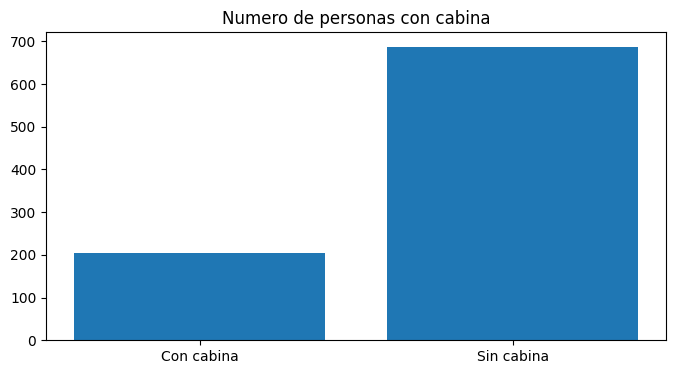

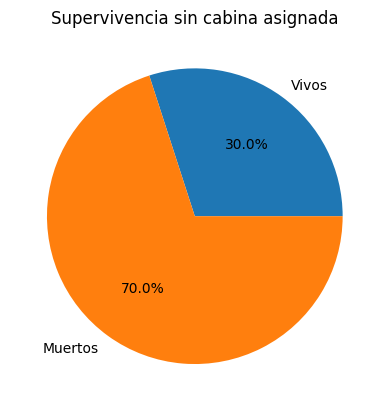

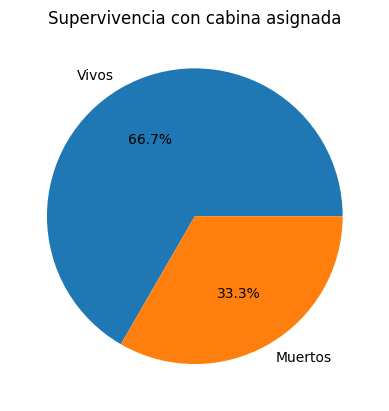

In [19]:
#vamos a ver cuanta gente tiene una cabina asignada
df['With cabin'] = np.where((df['Cabin'] == 'C0'),0,1)
count_cabin = df['With cabin'].value_counts().reindex([1,0])
#Mostramos los graficos con los datos
plt.figure(figsize=(8,4))
plt.bar(['Con cabina','Sin cabina'],count_cabin)
plt.title('Numero de personas con cabina')
plt.show()

#Vamos a ver las probabilidades de sobrevivir con y sin cabina asignada
#Primero calculamos la probabilidad de la gente sin cabina
without_cabin = df.loc[df['With cabin'] == 0] ['Survived']
rate_without_cabin = without_cabin.sum()/ len(without_cabin)
count_without = without_cabin.value_counts().reindex([1,0])
plt.pie(count_without,labels=['Vivos','Muertos'],autopct='%1.1f%%')
plt.title('Supervivencia sin cabina asignada')
plt.show()

#Segundo calculamos la probabilidad de la gente con cabina
with_cabin = df.loc[df['With cabin'] == 1] ['Survived']
rate_with_cabin = with_cabin.sum()/ len(with_cabin)
count_with = with_cabin.value_counts().reindex([1,0])
plt.pie(count_with,labels=['Vivos','Muertos'],autopct='%1.1f%%')
plt.title('Supervivencia con cabina asignada')
plt.show()